<a href="https://colab.research.google.com/github/manshakhanna2004/Iris-Flower-CodeAlpha-/blob/main/Iris_Flower_(CodeAlpha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.cluster import KMeans

In [ ]:
#Load Dataset
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#To show first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#To show last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
# Check class distribution
df['SepalLengthCm'].value_counts()


,count
SepalLengthCm,
5.0,10
6.3,9
5.1,9
6.7,8
5.7,8
6.4,7
5.5,7
5.8,7
4.9,6


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


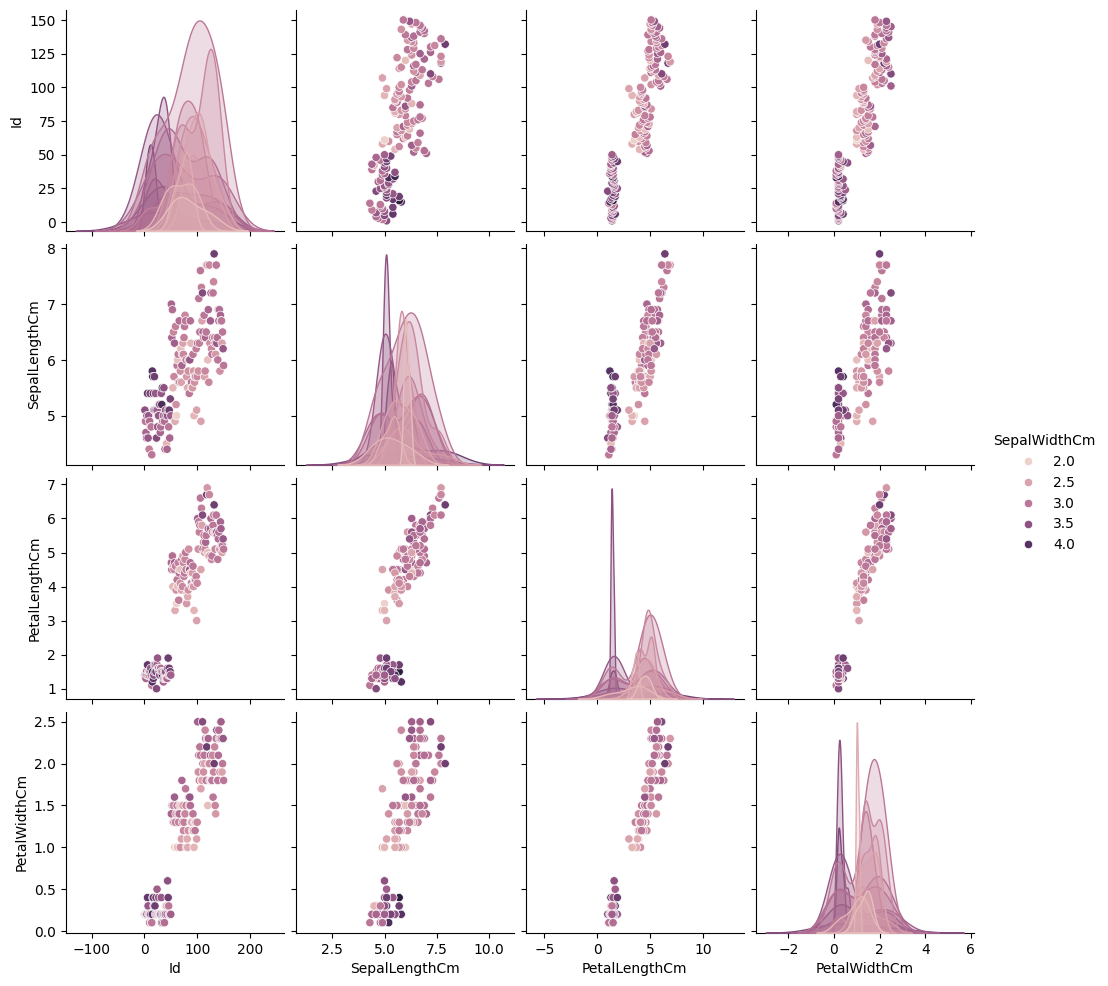

In [ ]:
# Pairplot
sns.pairplot(df, hue='SepalWidthCm')
plt.show()

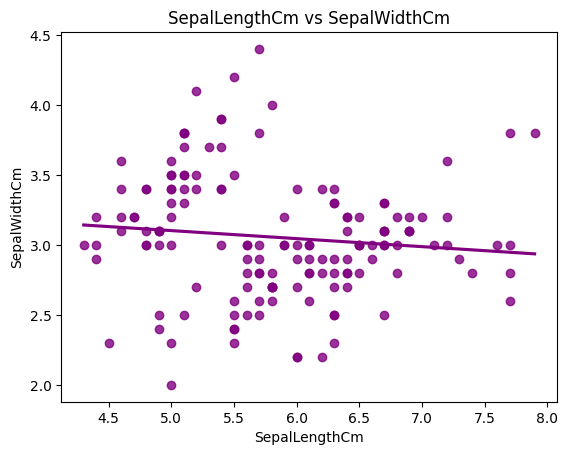

In [ ]:
sns.regplot(data=df, x='SepalLengthCm', y='SepalWidthCm',ci=None, marker='o', color='purple')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('SepalLengthCm vs SepalWidthCm')
plt.show()

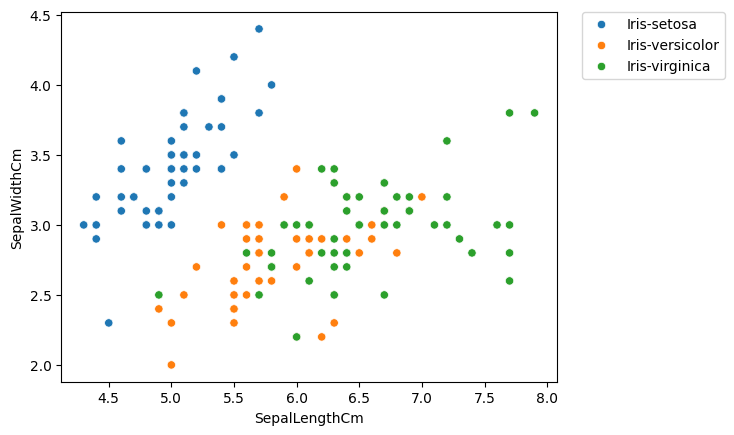

In [ ]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

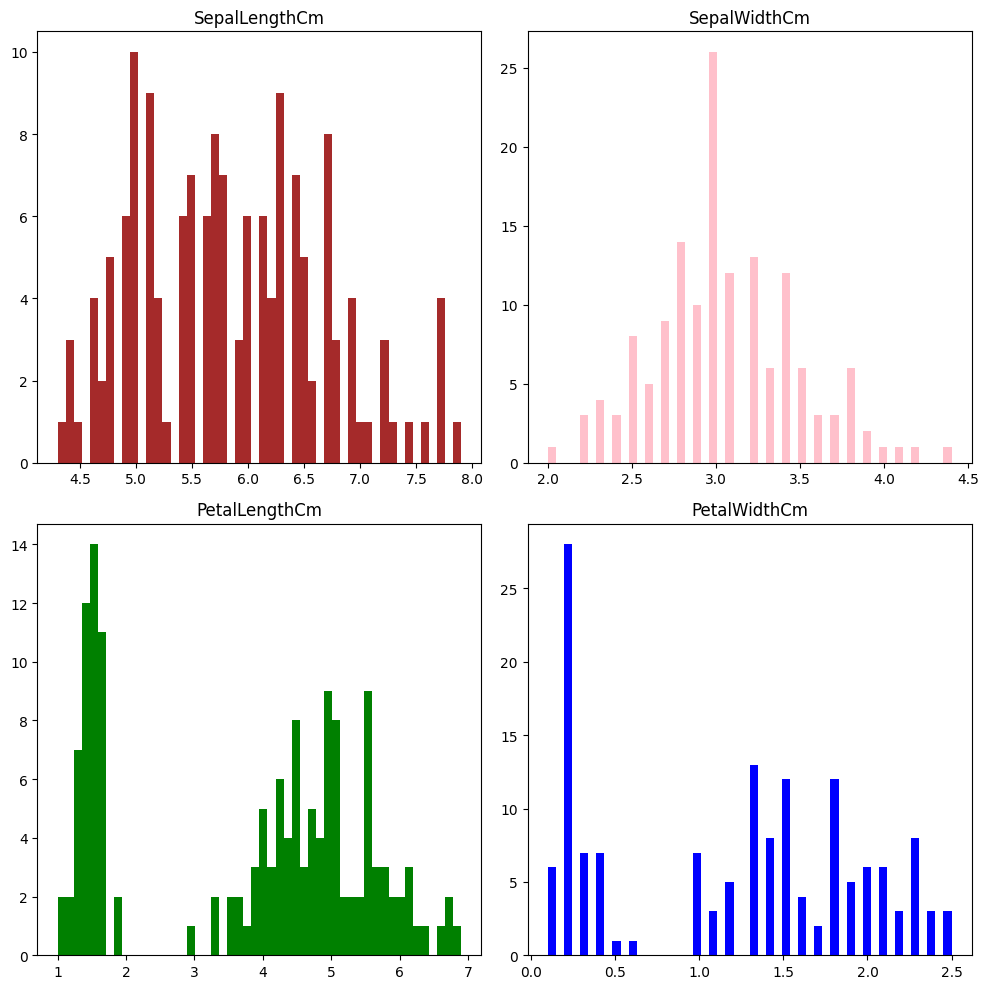

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].set_title('SepalLengthCm')
ax[0,0].hist(df['SepalLengthCm'], bins=50, color="brown")

ax[0,1].set_title('SepalWidthCm')
ax[0,1].hist(df['SepalWidthCm'], bins=50, color="pink")

ax[1,0].set_title('PetalLengthCm')
ax[1,0].hist(df['PetalLengthCm'], bins=50, color="green")

ax[1,1].set_title('PetalWidthCm')
ax[1,1].hist(df['PetalWidthCm'], bins=50, color="blue")

plt.tight_layout()
plt.show()

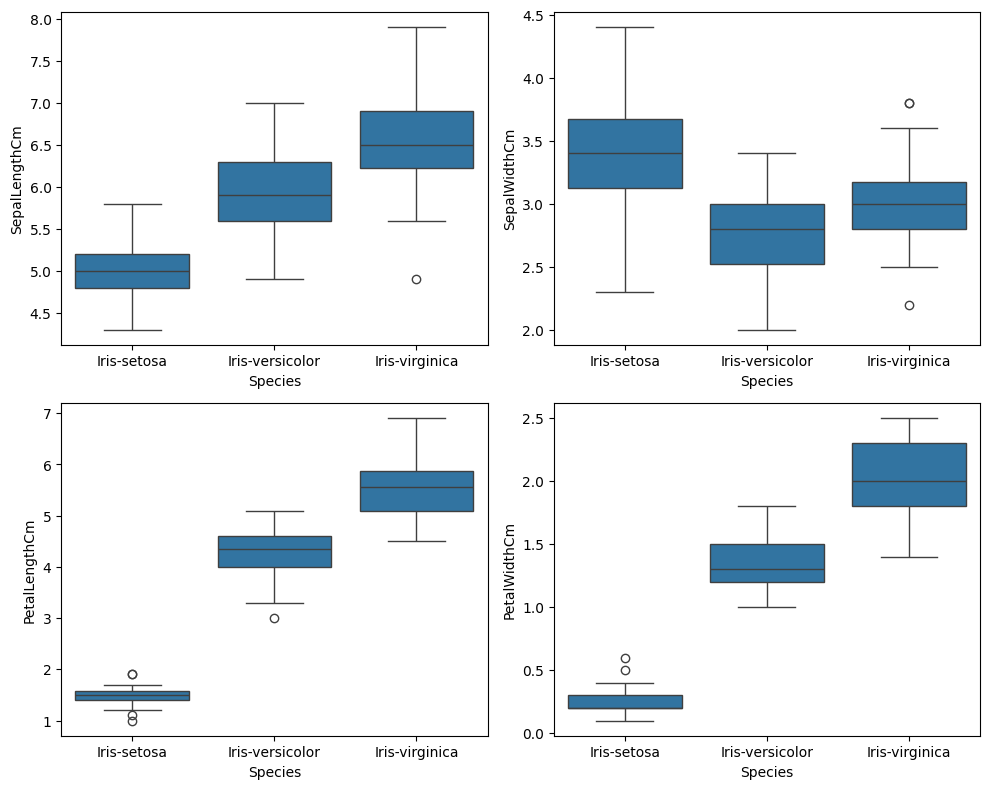

In [ ]:
# Function for drawing boxplot
def graph(y):
    sns.boxplot(x='Species', y=y, data=df)

# Create subplots
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
graph('SepalLengthCm')

plt.subplot(2,2,2)
graph('SepalWidthCm')

plt.subplot(2,2,3)
graph('PetalLengthCm')

plt.subplot(2,2,4)
graph('PetalWidthCm')

plt.tight_layout()

In [ ]:
# Checking the column names
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


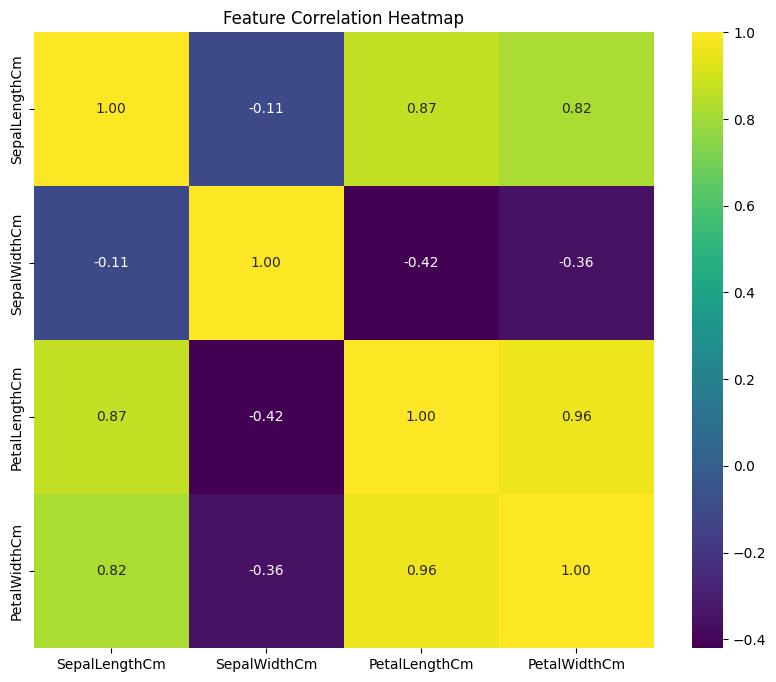

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df['SepalLengthCm'].unique()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data=df.values
x=data[:,0:4]
y=df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print(x_test)

[[74 6.1 2.8 4.7]
 [19 5.7 3.8 1.7]
 [119 7.7 2.6 6.9]
 [79 6.0 2.9 4.5]
 [77 6.8 2.8 4.8]
 [32 5.4 3.4 1.5]
 [65 5.6 2.9 3.6]
 [142 6.9 3.1 5.1]
 [69 6.2 2.2 4.5]
 [83 5.8 2.7 3.9]
 [111 6.5 3.2 5.1]
 [13 4.8 3.0 1.4]
 [37 5.5 3.5 1.3]
 [10 4.9 3.1 1.5]
 [20 5.1 3.8 1.5]
 [57 6.3 3.3 4.7]
 [105 6.5 3.0 5.8]
 [70 5.6 2.5 3.9]
 [56 5.7 2.8 4.5]
 [133 6.4 2.8 5.6]
 [30 4.7 3.2 1.6]
 [128 6.1 3.0 4.9]
 [27 5.0 3.4 1.6]
 [129 6.4 2.8 5.6]
 [132 7.9 3.8 6.4]
 [146 6.7 3.0 5.2]
 [109 6.7 2.5 5.8]
 [144 6.8 3.2 5.9]
 [46 4.8 3.0 1.4]
 [31 4.8 3.1 1.6]]


In [ ]:
from sklearn.svm import SVC
#creating model
model = SVC()

#Train model
model.fit(x_train,y_train)

SVC()

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.cluster import KMeans

wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['PetalLengthCm', 'PetalWidthCm']])
    wcss1.append(kmeans.inertia_)

In [ ]:
wcss1

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.316007803485395,
 14.147293864755932,
 11.056639971910453,
 9.297130812538596,
 8.043872171477286,
 6.773348650891444,
 6.254273015873015]

In [ ]:
from sklearn .tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

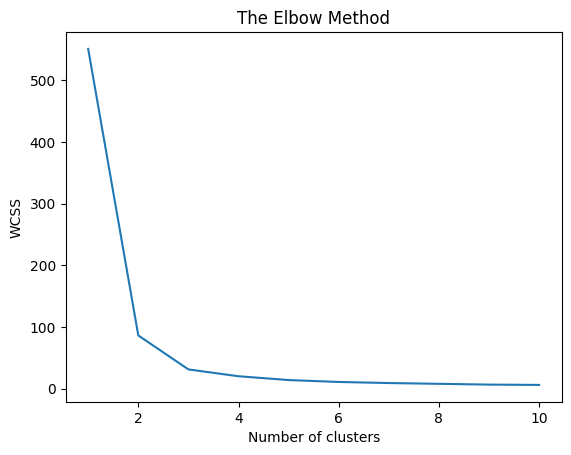

In [ ]:
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Copy dataframe
data_with_cluster1 = df.copy()


# Fit and predict cluster labels
data_with_cluster1['cluster'] = kmeans.fit_predict(df[['PetalLengthCm', 'PetalWidthCm']])

# Show dataframe with cluster column
data_with_cluster1



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
